# Skalarprodukt

In [3]:
# Bibliotheken

import numpy as np
import matplotlib.pyplot as pl
import matplotlib.ticker as tk


# Vektoren und Komponenten

def Vec (x, y):
    return np.array ([[x], [y]])

def X (v):
    return v [0] [0]

def Y (v):
    return v [1] [0]


# Skalarprodukt

def Dot (v, w):
    return (v.T @ w) [0] [0]

def Norm (v):
    return np.sqrt (Dot (v, v))

def Normalized (v):
    return v / Norm (v)


# Projektion

def Proj (v, w):
    return Dot (v, w) / Dot (w, w) * w


# Winkel

def Rad (phi):
    return np.pi * phi / 180.0

def Deg (rad):
    return 180.0 * rad / np.pi

def Arg (v):
    return Deg (np.arctan2 (Y (v), X (v)))


# Rotation

def Rot (phi):
    t = Rad (phi)
    c = np.cos (t)
    s = np.sin (t)
    return np.array ([
        [c, -s],
        [s,  c]
    ])

def Rot90L (v):
    return Vec (-Y (v), X (v))

def Rot90R (v):
    return Vec (Y (v), -X (v))


# Determinante

def Det (v, w):
    return X (v) * Y (w) - Y (v) * X (w)


# Argumente mit Schlüsselwörtern

def KwArg (kwargs, key, val):
    if key in kwargs:
        val = kwargs [key]
        del kwargs [key]
    return val


# Koordinatensystem

def PlotCS (**kwargs):
    major = KwArg (kwargs, 'major', 5)
    minor = KwArg (kwargs, 'minor', 1)
    xlim = KwArg (kwargs, 'xlim', None)
    ylim = KwArg (kwargs, 'ylim', None)
    ax = pl.gca()
    ax.axis ('equal')
    if xlim != None:
        ax.set_xlim (xlim)
    if ylim != None:
        ax.set_ylim (ylim)
    ax.grid (which = 'both')
    ax.xaxis.set_major_locator (tk.MultipleLocator (major))
    ax.xaxis.set_minor_locator (tk.MultipleLocator (minor))
    ax.yaxis.set_major_locator (tk.MultipleLocator (major))
    ax.yaxis.set_minor_locator (tk.MultipleLocator (minor))


# Vektor

def PlotVec (v, w, **kwargs):
    offs = KwArg (kwargs, 'offset', 0)
    lw = KwArg (kwargs, 'lw', 0.05)
    hw = KwArg (kwargs, 'hw', 0.4)
    hl = KwArg (kwargs, 'hl', 0.5)
    c = KwArg (kwargs, 'color', 'black')

    d = w - v; al = Norm (d); d = d / al
    y0 = Vec (- Y (d), X (d))
    delta = offs * y0
    v = v + delta
    w = w + delta
    
    sl = al - hl
    u = v + sl * d
    y1 = lw / 2 * y0
    y2 = hw / 2 * y0

    pp = np.concatenate ((v - y1, u - y1, u - y2, w, u + y2, u + y1, v + y1), axis = 1)
    pl.fill (pp [0], pp [1], color = c, **kwargs)

def PlotVec0 (v, **kwargs):
    PlotVec (Vec (0, 0), v, **kwargs)


# Linie

def PlotLine (v, w, **kwargs):
    offs = KwArg (kwargs, 'offset', 0)

    d = w - v; al = Norm (d); d = d / al
    y0 = Vec (- Y (d), X (d))
    delta = offs * y0
    v = v + delta
    w = w + delta

    pl.plot ([X (v), X (w)], [Y (v), Y (w)], **kwargs)

def PlotLine0 (v, **kwargs):
    PlotLine (Vec (0, 0), v, **kwargs)


# Parallelogramm

def PlotRhomb (q, v, w, **kwargs):
    pp = np.concatenate ((q, q + v, q + v + w, q + w), axis = 1)
    pl.fill (pp [0], pp [1], **kwargs)

def PlotRhomb0 (v, w, **kwargs):
    o = Vec (0, 0)
    PlotRhomb (o, v, w, **kwargs)


# Bogen

def PlotArc0 (r, phi0, phi1, **kwargs):
    h = 0.1
    t0 = Rad (phi0)
    t1 = Rad (phi1)
    n = np.round (r * np.abs (t1 - t0) / h) .astype (int)
    tt = np.linspace (t0, t1, n)
    pl.plot (r * np.cos (tt), r * np.sin (tt), **kwargs)

def PlotSect0 (a, b, **kwargs):
    phi = Arg (a)
    delta = Arg (b) - phi
    if Det (a, b) >= 0:
        if delta < 0:
            delta = delta + 360
    else:
        if delta > 0:
            xdelta = delta - 360
    PlotArc0 (Norm (a), phi, phi + delta, **kwargs)


# Text

def Text (pos, txt, **kwargs):
    fs = KwArg (kwargs, 'fontsize', 12)
    halign = KwArg (kwargs, 'ha', 'center')
    valign = KwArg (kwargs, 'va', 'center')
    offs = KwArg (kwargs, 'offset', 0)
    xoffs = KwArg (kwargs, 'xoffset', 0)
    yoffs = KwArg (kwargs, 'yoffset', 0)

    dir = Rot90L (pos)
    pos = pos + Vec (xoffs, yoffs) + offs * dir
    pl.text (pos [0] [0], pos [1] [0], txt, ha = halign, va = valign, fontsize = fs, **kwargs)


Matplotlib is building the font cache; this may take a moment.


In [9]:
# Definitionen


# Punkte

A = Vec (-3, 5)
B = Vec (2, 7)
C = Vec (2, 2)
S = 1.5


# Achsen

Xlim = (-10, 10)
Ylim = (-5, 10)


# Farben

ColA1 = 'red'
ColA2 = 'lightcoral'

ColB1 = 'blue'
ColB2 = 'cadetblue'

ColC1 = 'green'
ColC2 = 'mediumseagreen'

ColAB = 'thistle'
ColBC = 'khaki'


# pdf erzeugen

SavePdf = False

## Länge (Norm) eines Vektors

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


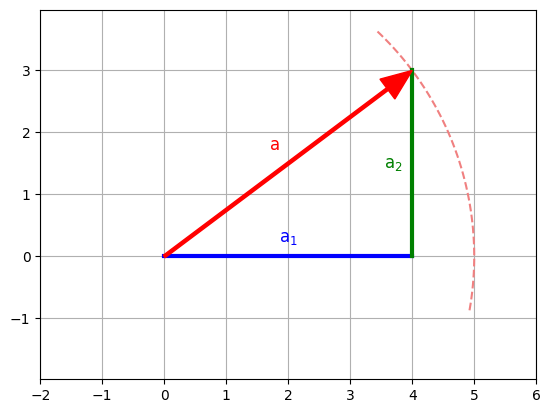

In [10]:
# Laenge

def Laenge (a):
    
    e1 = Vec (1, 0); x = Proj (a, e1)
    e2 = Vec (0, 1); y = Proj (a, e2)
    
    PlotCS (xlim = (-2, 6), ylim = (-2, 4), major = 1)

    PlotVec0 (a, color = ColA1, zorder = 10)
    PlotLine0 (x, color = ColB1, linewidth = 3, zorder = 5)
    PlotLine (x, x + y, color = ColC1, linewidth = 3, zorder = 5)
    
    Text (0.5 * a, '$\\mathrm{a}$', offset = 0.15, color = ColA1)
    Text (x / 2, '$\\mathrm{a}_1$', yoffset = 0.3, color = ColB1)
    Text (x + y / 2, '$\\mathrm{a}_2$', xoffset = -0.3, color = ColC1)
    
    PlotArc0 (Norm (a), -10, Arg (a) + 10, linestyle = '--', color = ColA2)

    if SavePdf:
        pl.savefig ('1-laenge.pdf')


Laenge (Vec (4, 3))

$\begin{align*}
    \mathbf{a} 
        & \;=\; \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}
        \;=\; \begin{pmatrix} 4 \\ 3\end{pmatrix}
\end{align*}$

Die Länge von $\mathbf{a}$ wird als Norm von $\mathbf{a}$ bezeichnet und in der Mathematik $|\mathbf{a}|$ geschrieben.
Nach Pythagoras gilt:

$\begin{align*}
    |\mathbf{a}|^2
        & \;=\; a_1^2 + a_2^2 \;=\; 4^2 + 3^2 \;=\; 16 + 9 \;=\; 25
        \\
\end{align*}$,

also

$\begin{align*}
    |\mathbf{a}|
        & \;=\; \sqrt{a_1^2 + a_2^2} \;=\; \sqrt{25} \;=\; 5
\end{align*}$

## Vektor normieren

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


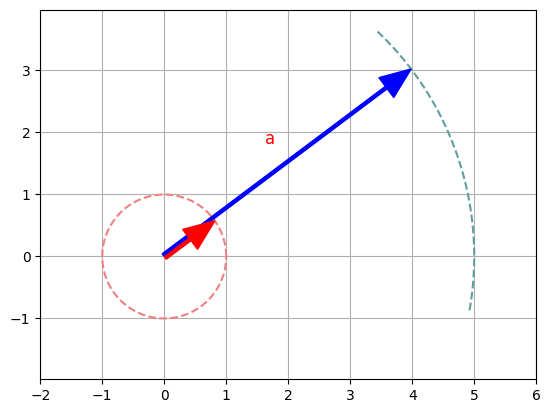

In [11]:
# Normieren

def Normieren (a):
    
    alen = Norm (a)
    a0 = a / Norm (a)
    
    PlotCS (xlim = (-2, 6), ylim = (-2, 4), major = 1)

    PlotVec0 (a, offset = 0.03, color = ColB1, zorder = 10)
    PlotVec0 (a0, offset = -0.03, color = ColA1, zorder = 10)
    
    PlotArc0 (Norm (a), -10, Arg (a) + 10, linestyle = '--', color = ColB2)
    PlotArc0 (1, 0, 360, linestyle = '--', color = ColA2)
    
    Text (0.5 * a, '$\\mathrm{a}$', offset = 0.2, color = ColA1)

    if SavePdf:
        pl.savefig ('2-normieren.pdf')


Normieren (Vec (4, 3))

Teilt man einen Vektor $\mathbf{a}$ durch seine eigene Länge, so erhält man einen Vektor der Länge $1$:

$\begin{align*}
    \mathbf{a} 
        & \;=\; \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}
        \;=\; \begin{pmatrix} 4 \\ 3 \end{pmatrix}
        \\
    |\mathbf{a}|
        & \;=\; \sqrt{a_1^2 + a_2^2} \;=\; \sqrt{3^2 + 4^2} \;=\; \sqrt{9 + 16} \;=\; \sqrt{25} \;=\; 5
        \\
    \mathbf{a}^0
        & \;=\; \frac{\mathbf{a}}{|\mathbf{a}|}
        \;=\; \frac{1}{\sqrt{a_1^2 + a_2^2}} \, \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}
        \;=\; \frac{1}{5} \cdot \begin{pmatrix} 4 \\ 3 \end{pmatrix}
        \;=\; \begin{pmatrix} \frac{4}{5} \\ \frac{3}{5} \end{pmatrix}
        \;=\; \begin{pmatrix} 0.8 \\ 0.6 \end{pmatrix}
        \\
    |\mathbf{a}^0|
        & \;=\; \sqrt{\left( \frac{4}{5} \right)^2 + \left( \frac{3}{5} \right)^2}
        \;=\; \sqrt{\frac{16}{25} + \frac{9}{25}}
        \;=\; \sqrt{\frac{16 + 9}{25}}
        \;=\; \sqrt{\frac{25}{25}}
        \;=\; \sqrt{1}
        \;=\; 1
\end{align*}$

Die Spitze des normierten Vektors $\mathbf{a}^0$ liegt auf dem Einheitskreis.

## Multiplikation von Zahlen in vektorieller Darstellung

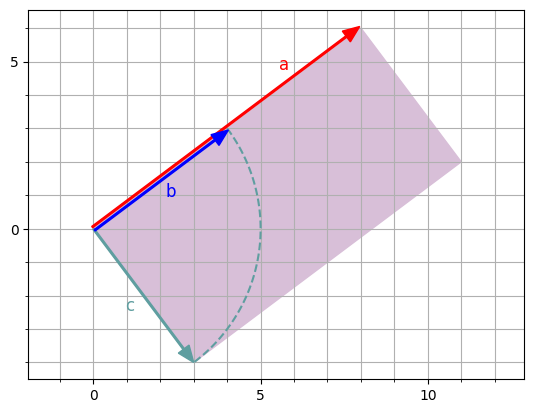

In [12]:
# Skalarprodukt 1

def Skalarprodukt1 (a, b):
    
    b1 = Proj (b, a)
    b2 = Rot90R (b1)
    
    PlotCS()

    PlotVec0 (a, offset = 0.06, color = ColA1, zorder = 30)

    PlotVec0 (b, offset = -0.06, color = ColB1, zorder = 40)
    PlotSect0 (b1, b2, color = ColB2, linestyle = '--', zorder = 20)
    PlotVec0 (b2, color = ColB2, zorder = 20)

    PlotRhomb0 (a, b2, color = ColAB, zorder = -10)
    
    Text (0.75 * a, '$\\mathrm{a}$', offset = 0.07, color = ColA1)
    Text (0.5 * b, '$\\mathrm{b}$', offset = -0.2, color = ColB1)    
    Text (0.5 * b2, '$\\mathrm{c}$', offset = -0.2, color = ColB2)    

    if SavePdf:
        pl.savefig ('3-skalarprodukt-parallel.pdf')


Skalarprodukt1 (Vec (8, 6), Vec (4, 3))

Zeigen beide Vektoren in die gleiche Richtung, ist ihr (Skalar-) Produkt das Produkt ihrer Längen:

$\begin{align*}
    \mathbf{a} \;\|\; \mathbf{b} \quad\implies\quad \mathbf{a} \cdot \mathbf{b} \;=\; |\mathbf{a}| \cdot |\mathbf{b}|
\end{align*}$

Dieses Produkt der Längen ist gleichzeitig auch der Flächeninhalt des von den Vektoren $\mathbf{a}$ und 
$\mathbf{c}$ aufgespannten Rechtecks.

Dabei ist $\;|\mathbf{b}|=|\mathbf{c}|\;$ und $\;\mathbf{c}\,\perp\,\mathbf{b}\;$.

## Multiplikation eines Vektors mit sich selbst

Das (Skalar-) Produkt eines Vektors mit sich selbst ist das Quadrat seiner Länge.

$\begin{align*}
    \mathbf{a} \cdot \mathbf{a} \;=\; |\mathbf{a}| \cdot |\mathbf{a}| \;=\; |\mathbf{a}|^2
\end{align*}$

## Multiplikation von Vektoren (unterschiedlicher Richtung)

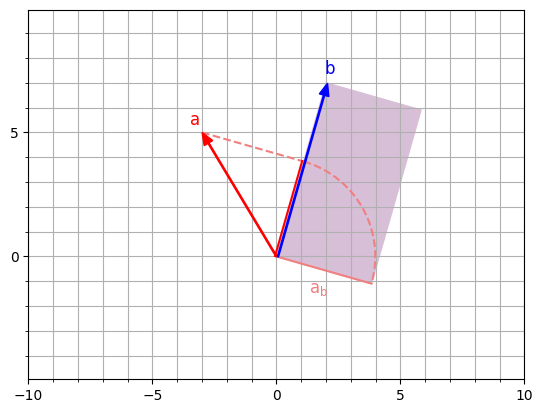

In [6]:
# Skalarprodukt 2

def Skalarprodukt2 (a, b):
    
    a1 = Proj (a, b); a2 = Norm (a1) * Normalized (a1 - a)

    PlotCS (xlim = Xlim, ylim = Ylim)

    PlotVec0 (a, color = ColA1, zorder = 30)
    PlotLine (a, a1, color = ColA2, linestyle = '--', zorder = 20)
    PlotSect0 (a1, a2, color = ColA2, linestyle = '--', zorder = 20)
    PlotLine0 (a1, color = ColA1, offset = 0.06, zorder = 20)
    PlotLine0 (a2, color = ColA2, zorder = 20)

    PlotVec0 (b, color = ColB1, offset = -0.06, zorder = 40)

    PlotRhomb0 (b, a2, color = ColAB, zorder = -10)
    
    Text (1.1 * a, '$\\mathrm{a}$', color = ColA1)
    Text (1.08 * b, '$\\mathrm{b}$', color = ColB1)
    Text (a2 / 2, '$\\mathrm{a}_{\\mathrm{b}}$', offset = -0.4, color = ColA2, zorder = 30)

    if SavePdf:
        pl.savefig ('4-skalarprodukt-allgemein.pdf')


Skalarprodukt2 (A, B)

Zeigen beide Vektoren in unterschiedliche Richtungen, kann man einen der beiden Vektoren auf den anderen projizieren.
<br>
Die Länge der Projektion des Vektors $\mathbf{a}$ auf den Vektor $\mathbf{b}$ bezeichnet man in der Mathematik mit $\mathbf{a}_\mathbf{b}$.
<br>
Achtung: $\mathbf{a}_\mathbf{b}$ ist eine Zahl, kein Vektor!
<br>
Mit der Länge der Projektion lässt sich ein sinnvolles Produkt von zwei Vektoren definieren:

$\begin{align*}
    \mathbf{a} \cdot \mathbf{b}
        & \;:\,=\; \mathbf{a}_\mathbf{b} \cdot |\mathbf{b}|
\end{align*}$

Das Skalarprodukt $\mathbf{a}\cdot\mathbf{b}$ der Vektoren $\mathbf{a}$ und $\mathbf{b}$ erhält man, 
<br>
indem man die Länge der Projektion $\mathbf{a}_\mathbf{b}$ des Vektors $\mathbf{a}$ auf den Vektor $\mathbf{b}$
<br>
mit der Länge $|\mathbf{b}|$ des Vektors $\mathbf{b}$ multipliziert.

## Skalarprodukt aufeinander senkrecht stehender Vektoren

Stehen zwei Vektoren aufeinander senkrecht, so ist die Projektion des einen Vektors auf den anderen der Nullvektor und die Länge der Projektion entsprechend $0$.
Daher verschwindet das Skalarprodukt.

$\begin{align*}
    \mathbf{a} \;\perp\; \mathbf{b}
        \quad\implies\quad \mathbf{a}_\mathbf{b} \;=\; 0
        \quad\implies\quad \mathbf{a} \cdot \mathbf{b}
            \;=\; \mathbf{a}_\mathbf{b}\cdot|\mathbf{b}|
            \;=\; 0\cdot|\mathbf{b}|
            \;=\; 0
\end{align*}$

## Das Skalarprodukt ist unabhängig von der Reihenfolge seiner Argumente (Kommutativgesetz)

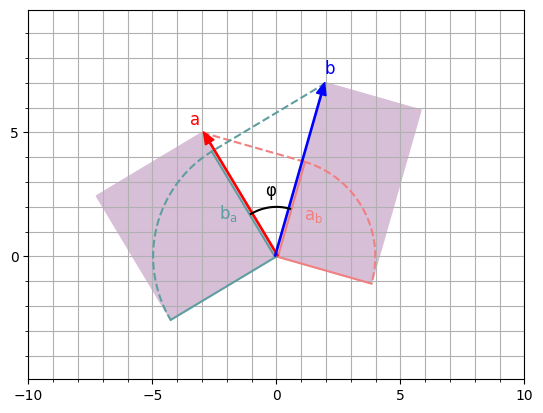

In [7]:
# Skalarprodukt 3

def Skalarprodukt3 (a, b):
    
    a1 = Proj (a, b); a2 = Norm (a1) * Normalized (a1 - a)
    b1 = Proj (b, a); b2 = Norm (b1) * Normalized (b1 - b)

    PlotCS (xlim = Xlim, ylim = Ylim)

    PlotVec0 (a, offset = -0.06, color = ColA1, zorder = 30)
    PlotLine (a, a1, color = ColA2, linestyle = '--', zorder = 20)
    PlotSect0 (a1, a2, color = ColA2, linestyle = '--', zorder = 20)
    PlotLine0 (a1, offset = -0.06, color = ColA2, zorder = 20)
    PlotLine0 (a2, color = ColA2, zorder = 20)

    PlotVec0 (b, offset = 0.06, color = ColB1, zorder = 40)
    PlotLine (b, b1, color = ColB2, linestyle = '--', zorder = 20)
    PlotSect0 (b1, b2, color = ColB2, linestyle = '--', zorder = 20)
    PlotLine0 (b1, offset = 0.06, color = ColB2, zorder = 20)
    PlotLine0 (b2, color = ColB2, zorder = 20)
    
    PlotSect0 (2 * b / Norm (b), a, color = 'black', zorder = 40)

    PlotRhomb0 (a, b2, color = ColAB, zorder = -10)
    PlotRhomb0 (b, a2, color = ColAB, zorder = -10)
    
    Text (1.1 * a, '$\\mathrm{a}$', color = ColA1)
    Text (1.08 * b, '$\\mathrm{b}$', color = ColB1)
    Text (a1 / 2, '$\\mathrm{a}_{\\mathrm{b}}$', offset = -0.5, color = ColA2, zorder = 40)
    Text (b1 / 2, '$\\mathrm{b}_{\\mathrm{a}}$', offset = 0.3, color = ColB2, zorder = 40)
    Text (Vec (0.5, 2.5), chr(966), offset = 0.3, color = 'black')

    if SavePdf:
        pl.savefig ('5-skalarprodukt-kommutativ.pdf')


Skalarprodukt3 (A, B)

Ist $\varphi$ der zwischen den Vektoren $\mathbf{a}$ und $\mathbf{b}$ eingeschlossene Winkel, so ist

$\begin{align*}
    \cos(\varphi)
        & \;=\; \frac{\mathbf{a}_\mathbf{b}}{|\mathbf{a}|}
        \;=\; \frac{\mathbf{b}_\mathbf{a}}{|\mathbf{b}|}
        \\[3pt]
\end{align*}$.

Multipliziert man diese Gleichung mit $|\mathbf{a}|\cdot|\mathbf{b}|$, so erhält man

$\begin{align*}
    |\mathbf{a}|\cdot|\mathbf{b}|\cdot\cos(\varphi)
        & \;=\; |\mathbf{a}|\cdot|\mathbf{b}|\cdot\frac{\mathbf{a}_\mathbf{b}}{|\mathbf{a}|}
        \;=\; |\mathbf{a}|\cdot|\mathbf{b}|\cdot\frac{\mathbf{b}_\mathbf{a}}{|\mathbf{b}|}
        \\[3pt]
    |\mathbf{a}|\cdot|\mathbf{b}|\cdot\cos(\varphi)
        & \;=\; \mathbf{a}_\mathbf{b}\cdot|\mathbf{b}|
        \;=\; \mathbf{b}_\mathbf{a}\cdot|\mathbf{a}|
        \\[3pt]
\end{align*}$.

und schliesslich

$\begin{align*}
    \mathbf{a} \cdot \mathbf{b}
        & \;=\; \mathbf{b} \cdot \mathbf{a}
        \;=\; |\mathbf{a}|\cdot|\mathbf{b}|\cdot\cos(\varphi)
\end{align*}$.

## Das Skalarprodukt ist mit der Vektoraddition verträglich (Distributivgesetz)

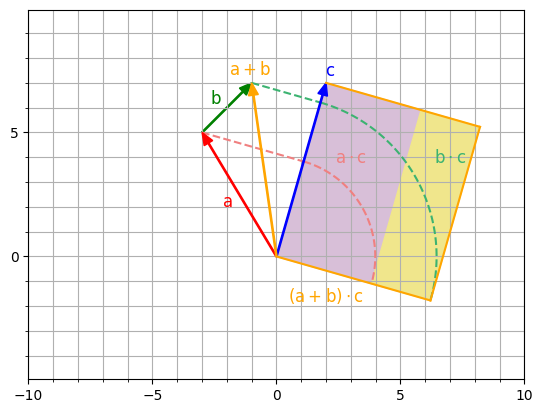

In [8]:
# Skalarprodukt 4

def Skalarprodukt4 (a, b, c):

    d = a + b
    a1 = Proj (a, c); a2 = Norm (a1) * Normalized (a1 - a)
    b1 = Proj (b, c); b2 = Norm (b1) * Normalized (b1 - b)
    d1 = Proj (d, c); d2 = Norm (d1) * Normalized (d1 - d)

    PlotCS (xlim = Xlim, ylim = Ylim)

    PlotVec0 (a, color = ColA1, zorder = 20)
    PlotLine (a, a1, color = ColA2, linestyle = '--', zorder = 10)
    PlotSect0 (a1, a2, color = ColA2, linestyle = '--', zorder = 10)

    PlotVec (a, d, color = ColC1)
    PlotLine (d, d1, color = ColC2, linestyle = '--', zorder = 20)
    PlotSect0 (d1, d2, color = ColC2, linestyle = '--', zorder = 10)

    PlotVec0 (c, color = ColB1, zorder = 20)

    PlotVec0 (d, color = 'orange', zorder = 20)
    PlotLine0 (d2, color = 'orange', zorder = 20)
    PlotLine (d2, c + d2, color = 'orange', zorder = 20)
    PlotLine (c + d2, c, color = 'orange', zorder = 20)

    PlotRhomb0 (a2, c, color = ColAB, zorder = -10)
    PlotRhomb (a2, d2 - a2, c, color = ColBC, zorder = -10)
    
    Text (a / 2, '$\\mathrm{a}$', offset = 0.2, color = ColA1)
    Text (Vec (-0.5, 6.5), '$\\mathrm{b}$', offset = 0.3, color = ColC1)
    Text (Vec (1.1, 7.2), '$\\mathrm{a + b}$', offset = 0.3, color = 'orange')
    Text (1.07 * c, '$\\mathrm{c}$', color = ColB1)
    Text (Vec (3, 4), '$\\mathrm{a}\\cdot\\mathrm{c}$', color = ColA2, zorder = 40)
    Text (Vec (7, 4), '$\\mathrm{b}\\cdot\\mathrm{c}$', color = ColC2, zorder = 40)
    Text (Vec (2, -1.6), '$(\\mathrm{a}+\\mathrm{b})\\cdot\\mathrm{c}$', color = 'orange', zorder = 40)

    if SavePdf:
        pl.savefig ('6-skalarprodukt-distributiv.pdf')


Skalarprodukt4 (A, C, B)

Die orange umrandete Fläche teilt sich in die violett schraffierte Fläche und die gelb schraffierte Fläche auf. Also gilt

$\begin{align*}
    (\mathbf{a} + \mathbf{b}) \cdot \mathbf{c}
        & \;=\; \mathbf{a} \cdot \mathbf{c} + \mathbf{b} \cdot \mathbf{c}
\end{align*}$

Durch Anwendung des Kommutativgesetzes erhält man auch

$\begin{align*}
    \mathbf{a} \cdot (\mathbf{b} + \mathbf{c})
        & \;=\; (\mathbf{b} + \mathbf{c}) \cdot \mathbf{a}
        \;=\; \mathbf{b} \cdot \mathbf{a} + \mathbf{c} \cdot \mathbf{a}
        \;=\; \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c}
\end{align*}$


## Das Skalarprodukt ist mit der skalaren Multiplikation verträglich (Assoziativgesetz)

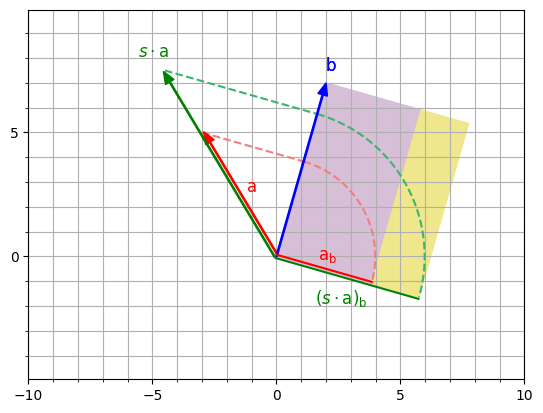

In [9]:
# Skalarprodukt 5

def Skalarprodukt5 (a, b, c):

    a1 = Proj (a, b); a2 = Norm (a1) * Normalized (a1 - a)
    c1 = Proj (c, b); c2 = Norm (c1) * Normalized (c1 - c)

    PlotCS (xlim = Xlim, ylim = Ylim)

    PlotVec0 (a, offset = -0.07, color = ColA1, zorder = 20)
    PlotLine (a, a1, color = ColA2, linestyle = '--', zorder = 10)
    PlotSect0 (a1, a2, color = ColA2, linestyle = '--', zorder = 10)
    PlotLine0 (a2, color = ColA1, offset = 0.07, zorder = 30)

    PlotVec0 (b, color = ColB1, zorder = 20)

    PlotVec0 (c, offset = 0.07, color = ColC1, zorder = 20)
    PlotLine (c, c1, color = ColC2, linestyle = '--', zorder = 10)
    PlotSect0 (c1, c2, color = ColC2, linestyle = '--', zorder = 10)
    PlotLine0 (c2, color = ColC1, offset = -0.07, zorder = 30)
    
    PlotRhomb0 (a2, b, color = ColAB, zorder = -10)
    PlotRhomb (a2, c2 - a2, b, color = ColBC, zorder = -10)
    
    Text (a / 2, '$\\mathrm{a}$', offset = -0.2, color = ColA1)
    Text (1.1 * c, '$s\\cdot\\mathrm{a}$', color = ColC1)
    Text (1.1 * b, '$\\mathrm{b}$', color = ColB1)
    Text (1.1 * b, '$\\mathrm{b}$', color = ColB1)
    Text (a2 / 2, '$\\mathrm{a}_\\mathrm{b}$', offset = 0.3, color = ColA1)
    Text (c2 / 2, '$(s\\cdot\\mathrm{a})_\\mathrm{b}$', offset = -0.3, color = ColC1)

    if SavePdf:
        pl.savefig ('7-skalarprodukt-assoziativ.pdf')


Skalarprodukt5 (A, B, S * A)

Das Verhältnis der Längen von $s\cdot\mathbf{a}$ und $\mathbf{a}$ ist gleich dem Verhältnis der Projektionen beider Vektoren 
auf den Vektor $\mathbf{b}$ und gleich dem Verhältnis der Summe aus violetter und gelber Fläche zu violetter Fläche:

$\begin{align*}
s 
    &\;=\; \frac{s\cdot|\mathbf{a}|}{|\mathbf{a}|}
    \;=\; \frac{|s\cdot\mathbf{a}|}{|\mathbf{a}|}
    \;=\; \frac{(s\cdot\mathbf{a})_\mathbf{b}}{\mathbf{a}_\mathbf{b}}
    \;=\; \frac{(s\cdot\mathbf{a})_\mathbf{b}\cdot|\mathbf{b}|}{\mathbf{a}_\mathbf{b}\cdot|\mathbf{b}|}
    \;=\; \frac{(s\cdot\mathbf{a})\cdot\mathbf{b}}{\mathbf{a}\cdot\mathbf{b}}
\end{align*}$

Umstellen der Gleichung liefert

$\begin{align*}
    (s \cdot \mathbf{a}) \cdot \mathbf {b}
        &\;=\; s \cdot (\mathbf{a} \cdot \mathbf {b})
\end{align*}$

Durch Anwendung des Kommutativgesetzes erhält man auch

$\begin{align*}
    \mathbf{a} \cdot (s \cdot \mathbf {b})
        &\;=\; (s \cdot \mathbf{b}) \cdot \mathbf {a}
        \;=\; s \cdot (\mathbf{b} \cdot \mathbf {a})
        \;=\; s \cdot (\mathbf{a} \cdot \mathbf {b})
\end{align*}$



## Das Skalarprodukt, arithmetisch

#### Legende

$\begin{align*}
    \newcommand{\NN}{\cdot}
    \newcommand{\NV}{\circ}
    \newcommand{\VV}{\bullet}
    \mbox{Zahl}   & \NN \mbox{Zahl}   & &\mapsto & &\mbox{Zahl}   & & \mbox{(Multiplikation)}, \\[6pt]
    \mbox{Zahl}   & \NV \mbox{Vektor} & &\mapsto & &\mbox{Vektor} & & \mbox{(skalare Multiplikation)} \\[6pt]
    \mbox{Vektor} & \VV \mbox{Vektor} & &\mapsto & &\mbox{Zahl}   & & \mbox{(Skalarprodukt)}
\end{align*}$

#### Rechenregeln

$\begin{align*}
    \newcommand{\NN}{\cdot}
    \newcommand{\NV}{\circ}
    \newcommand{\VV}{\bullet}
    \mathbf{a} \VV \mathbf{b} 
        & \;=\; \mathbf{b} \VV \mathbf{a}
        &&&& \textrm{(Kommutativgesetz)}
        \\[6pt]
    (\mathbf{a} + \mathbf{b}) \VV \mathbf{c} 
        & \;=\; \mathbf{a} \VV \mathbf{c} + \mathbf{b} \VV \mathbf{c}
        & \mathbf{a} \VV (\mathbf{b} + \mathbf{c})
        & \;=\; \mathbf{a} \VV \mathbf{b} + \mathbf{a} \VV \mathbf{c}
        && \textrm{(Distributivgesetz)}
        \\[6pt]
    (\lambda \NV \mathbf{a}) \VV \mathbf{b}
        & \;=\; \lambda \NN (\mathbf{a} \VV \mathbf{b})
        & \mathbf{a} \VV (\lambda \NV \mathbf{b})
        & \;=\; \lambda \NN (\mathbf{a} \VV \mathbf{b})
        && \textrm{(Assoziativgesetz)}
\end{align*}$

#### Herleitung

$\begin{align*}
    \newcommand{\NN}{\cdot}
    \newcommand{\NV}{\circ}
    \newcommand{\VV}{\bullet}
    \mathbb{R}^2 \;\ni\; \mathbf{a} &
        \;=\; \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}
        \;=\; \begin{pmatrix} a_1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ a_2 \end{pmatrix}
        \;=\; a_1 \NV \begin{pmatrix} 1 \\ 0 \end{pmatrix} + a_2 \NV \begin{pmatrix} 0 \\ 1 \end{pmatrix}
        \;=\; a_1 \NV \mathbf{e}_1 + a_2 \NV \mathbf{e}_2
        \\[6pt]
    \mathbb{R}^2 \;\ni\; \mathbf{b} &
        \;=\; \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
        \;=\; b_1 \NV \mathbf{e}_1 + b_2 \NV \mathbf{e}_2
        \\[6pt]
    \mathbf{a} \VV \mathbf{b}
        & \;=\; \begin{pmatrix} a_1 \\ a_2 \end{pmatrix} \VV \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
            \\[3pt]
        & \;=\; (a_1 \NV \mathbf{e}_1 + a_2 \NV \mathbf{e}_2) \VV (b_1 \NV \mathbf{e}_1 + b_2 \NV \mathbf{e}_2)
            \\
        & \;=\; (a_1 \NV \mathbf{e}_1) \VV (b_1 \NV \mathbf{e}_1 + b_2 \NV \mathbf{e}_2)
              + (a_2 \NV \mathbf{e}_2) \VV (b_1 \NV \mathbf{e}_1 + b_2 \NV \mathbf{e}_2)
            \\
        & \;=\; (a_1 \NV \mathbf{e}_1) \VV (b_1 \NV \mathbf{e}_1)
              + (a_1 \NV \mathbf{e}_1) \VV (b_2 \NV \mathbf{e}_2)
              + (a_2 \NV \mathbf{e}_2) \VV (b_1 \NV \mathbf{e}_1)
              + (a_2 \NV \mathbf{e}_2) \VV (b_2 \NV \mathbf{e}_2)
            \\
        & \;=\; a_1 \NN (\mathbf{e}_1 \VV (b_1 \NV \mathbf{e}_1))
              + a_1 \NN (\mathbf{e}_1 \VV (b_2 \NV \mathbf{e}_2))
              + a_2 \NN (\mathbf{e}_2 \VV (b_1 \NV \mathbf{e}_1))
              + a_2 \NN (\mathbf{e}_2 \VV (b_2 \NV \mathbf{e}_2))
            \\
        & \;=\; a_1 \NN b_1 \NN (\mathbf{e}_1 \VV \mathbf{e}_1)
              + a_1 \NN b_2 \NN (\mathbf{e}_1 \VV \mathbf{e}_2)
              + a_2 \NN b_1 \NN (\mathbf{e}_2 \VV \mathbf{e}_1)
              + a_2 \NN b_2 \NN (\mathbf{e}_2 \VV \mathbf{e}_2)
            \\
        & \;=\; a_1 \NN b_1 \NN 1
              + a_1 \NN b_2 \NN 0
              + a_2 \NN b_1 \NN 0
              + a_2 \NN b_2 \NN 1
            \\[3pt]
        & \;=\; a_1 \NN b_1 + a_2 \NN b_2
            \\[6pt]
    \mathbf{a} \mathbf{b}
        & \;=\; \begin{pmatrix} a_1 \\ a_2 \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
        \;=\; a_1 b_1 + a_2 b_2
\end{align*}$

#### Generalisierung auf beliebige Dimensionen

$\begin{align*}
    \newcommand{\NN}{\cdot}
    \newcommand{\NV}{\circ}
    \newcommand{\VV}{\bullet}
    \mathbb{R}^n \;\ni\; \mathbf{a}
        & \;=\; a_1 \NV \mathbf{e}_1 + a_2 \NV \mathbf{e}_2 + \dots + a_n \NV \mathbf{e}_n
        \;=\; \sum_{j=1}^n \, a_j \NV \mathbf{e}_j
        \\
    \mathbb{R}^n \;\ni\; \mathbf{b}
        & \;=\; \sum_{k=1}^n \, b_k \NV \mathbf{e}_k
        \\[9pt]
    \mathbf{a} \VV \mathbf{b}
        & \;=\; \left( \sum_{j=1}^n \, a_j \NV \mathbf{e}_j \right)
                \left( \sum_{k=1}^n \, b_k \NV \mathbf{e}_k \right)
        \;=\; \sum_{j=1}^n \, \sum_{k=1}^n \, (a_j \NV \mathbf{e}_j) \VV (b_k \NV \mathbf{e}_k)
        \;=\; \sum_{j,k=1}^n \, a_j \NN b_k \NN (\mathbf{e}_j \VV \mathbf{e}_k)
        \;=\; \sum_{j,k=1}^n \, a_j \NN b_k \NN \delta_{jk}
        \;=\; \sum_{k=1}^n \, a_k \NN b_k
        \\[9pt]
    \mathbf{a} \mathbf{b}
        & \;=\; \begin{pmatrix} a_1 \\ a_2 \\ \vdots \\ a_n \end{pmatrix}
                \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}
        \;=\; a_1 b_1 + a_2 b_2 + \dots + a_n b_n
        \;=\; \sum_{k=1}^n \, a_k b_k
\end{align*}$

#### Kronecker-Delta

$\begin{align*}
    \delta_{jk}
        & \;=\; 
            \begin{cases} 
                1, & \text{falls } \, j \,=\, k \\ 
                0, & \text{falls } \, j \,\neq\, k 
            \end{cases}
\end{align*}$